In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
dataset = pd.read_csv('Social_Network_Ads.csv')
dataset.head(2)

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0


In [9]:
X = dataset.iloc[:,:-1].values
Y = dataset.iloc[:,-1].values

In [10]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,random_state=0,test_size=0.25)

In [11]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
xtrain = sc.fit_transform(xtrain)
xtest = sc.transform(xtest)

In [12]:
from sklearn.svm import SVC
model = SVC(kernel='sigmoid')
model.fit(xtrain,ytrain)
predict = model.predict(xtest)

In [13]:
pd.DataFrame({'actual':ytest,'predicted':predict})

,actual,predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
95,1,0
96,0,0
97,1,0
98,1,1


In [14]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(ytest,predict))
print(confusion_matrix(ytest,predict))

              precision    recall  f1-score   support

           0       0.82      0.79      0.81        68
           1       0.59      0.62      0.61        32

    accuracy                           0.74       100
   macro avg       0.70      0.71      0.71       100
weighted avg       0.74      0.74      0.74       100

[[54 14]
 [12 20]]


In [15]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest,predict)

0.74

Text(0.5, 1.0, 'actual')

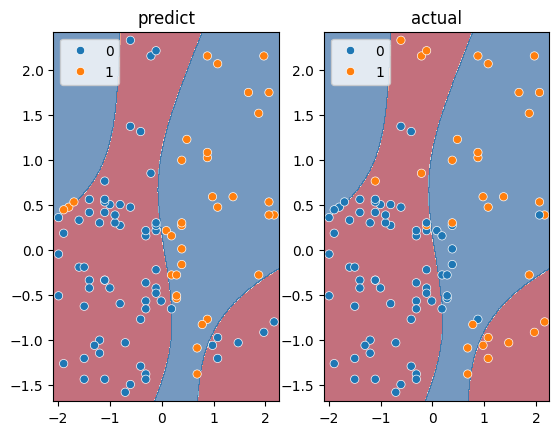

In [16]:
fig,axes = plt.subplots(1,2)
x_min, x_max = xtest[:, 0].min() - 0.1, xtest[:, 0].max() + 0.1
y_min, y_max = xtest[:, 1].min() - 0.1, xtest[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
axes[0].contourf(xx,yy,Z, cmap=plt.cm.RdBu, alpha=0.6)
sns.scatterplot(x= xtest[:,0],y = xtest[:,1],hue=predict,ax=axes[0])
axes[0].set_title('predict')

x_min, x_max = xtest[:, 0].min() - 0.1, xtest[:, 0].max() + 0.1
y_min, y_max = xtest[:, 1].min() - 0.1, xtest[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
axes[1].contourf(xx,yy,Z, cmap=plt.cm.RdBu, alpha=0.6)
sns.scatterplot(x= xtest[:,0],y = xtest[:,1],hue=ytest,ax=axes[1])
axes[1].set_title('actual')
